# Adult Data Income Classification Notebook

### 1. Data Preprocessing and Visualization

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv("/home/jovyan/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [53]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Checking for null and/or missing values

In [54]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [55]:
df.columns.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [56]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [85]:
df = df.replace('?', np.NaN)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [58]:
df = df.dropna()
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


Mapping the income labels numerically

In [59]:
df['income'] = df['income'].map({'<=50K':0, '>50K':1})
df.income.head()

1    0
3    0
4    0
5    0
6    0
Name: income, dtype: int64

In [60]:
numerical_df = df.select_dtypes(exclude=['object'])
numerical_df.columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income'],
      dtype='object')

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

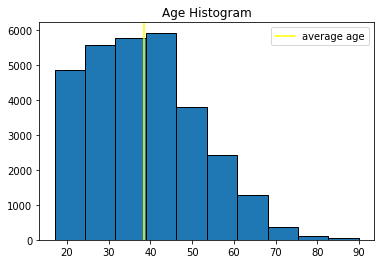

In [62]:
plt.hist(df['age'], edgecolor='black')
plt.title('Age Histogram')
plt.axvline(np.mean(df['age']), color='yellow', label='average age')
plt.legend()

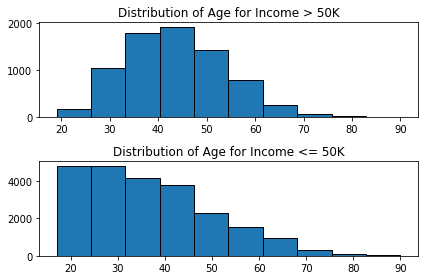

In [63]:
age50k = df[df['income']==1].age
agel50k = df[df['income']==0].age

fig, axs = plt.subplots(2, 1)

axs[0].hist(age50k, edgecolor='black')
axs[0].set_title('Distribution of Age for Income > 50K')

axs[1].hist(agel50k, edgecolor='black')
axs[1].set_title('Distribution of Age for Income <= 50K')
plt.tight_layout()

#### Inferences:

For Income > 50K, Age is almost normally distributed

For Income <=50K, Age is positively skewed. More people in the 20s and 30s have income <= 50K.

In [64]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

/home/jovyan/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


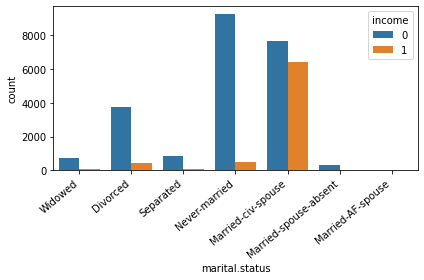

In [65]:
ax = sns.countplot(df['marital.status'], hue=df['income'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

#### Converting marital.status to 2 categories

It seems better to reduce the number of categories for marital status to better visualize the effect of marital status on income. 
We need to convert the following into 2 distinct categories namely, "married" and "single"

In [66]:
df['marital.status'] = df['marital.status'].replace(['Widowed', 'Divorced', 'Separated', 'Never-married'], 'single')

df['marital.status'] = df['marital.status'].replace(['Married-spouse-absent', 'Married-civ-spouse', 'Married-AF-spouse'], 'married')

In [67]:
categorical_df = df.select_dtypes(include=['object'])
categorical_df.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

/home/jovyan/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='marital.status', ylabel='count'>

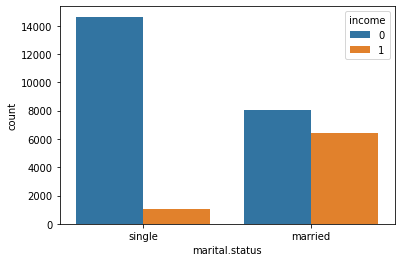

In [68]:
sns.countplot(df['marital.status'], hue=df['income'])

#### Inference:

Married people are more likely to earn more than 50K as income

#### Encoding categorical variables numerically for classification 

In [69]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

/home/jovyan/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '')

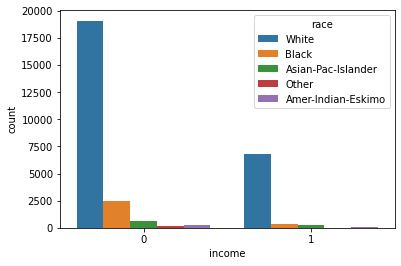

In [70]:
ax = sns.countplot(df['income'], hue=df['race'])
ax.set_title('')

In [71]:
categorical_df = categorical_df.apply(enc.fit_transform)
categorical_df.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1,2,11,1,3,1,4,0,38
3,2,5,1,6,4,4,0,38
4,2,15,1,9,3,4,0,38
5,2,11,1,7,4,4,0,38
6,2,0,1,0,4,4,1,38


In [72]:
df = df.drop(categorical_df.columns, axis=1)
df = pd.concat([df, categorical_df], axis=1)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1,82,132870,9,0,4356,18,0,2,11,1,3,1,4,0,38
3,54,140359,4,0,3900,40,0,2,5,1,6,4,4,0,38
4,41,264663,10,0,3900,40,0,2,15,1,9,3,4,0,38
5,34,216864,9,0,3770,45,0,2,11,1,7,4,4,0,38
6,38,150601,6,0,3770,40,0,2,0,1,0,4,4,1,38


/home/jovyan/.local/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


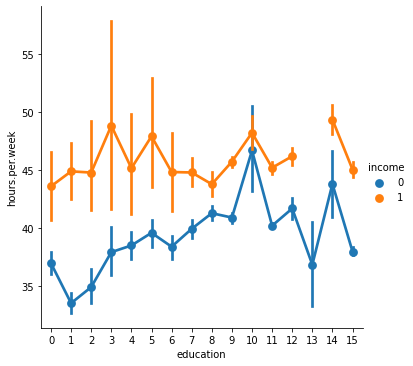

In [73]:
sns.factorplot(data=df, x='education', y='hours.per.week', hue='income', kind='point')

/home/jovyan/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


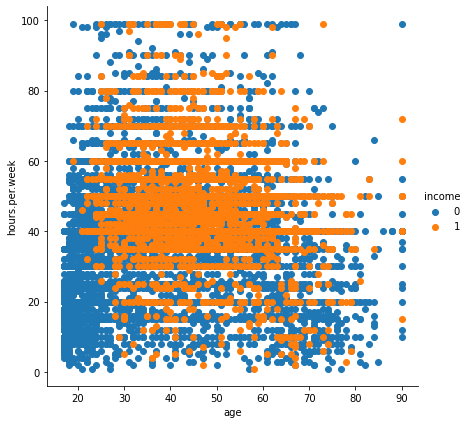

In [74]:
sns.FacetGrid(data=df, hue='income', size=6).map(plt.scatter, 'age', 'hours.per.week').add_legend()

#### Inferences: 
    1. Maximum people between the age of 25 to 80 earn more than 50K as income
    2. Most people which work atleast 36 to 70 hours a week earn more than 50K
    3. Most people under the age of 20 earn less than as m50K income

<AxesSubplot:>

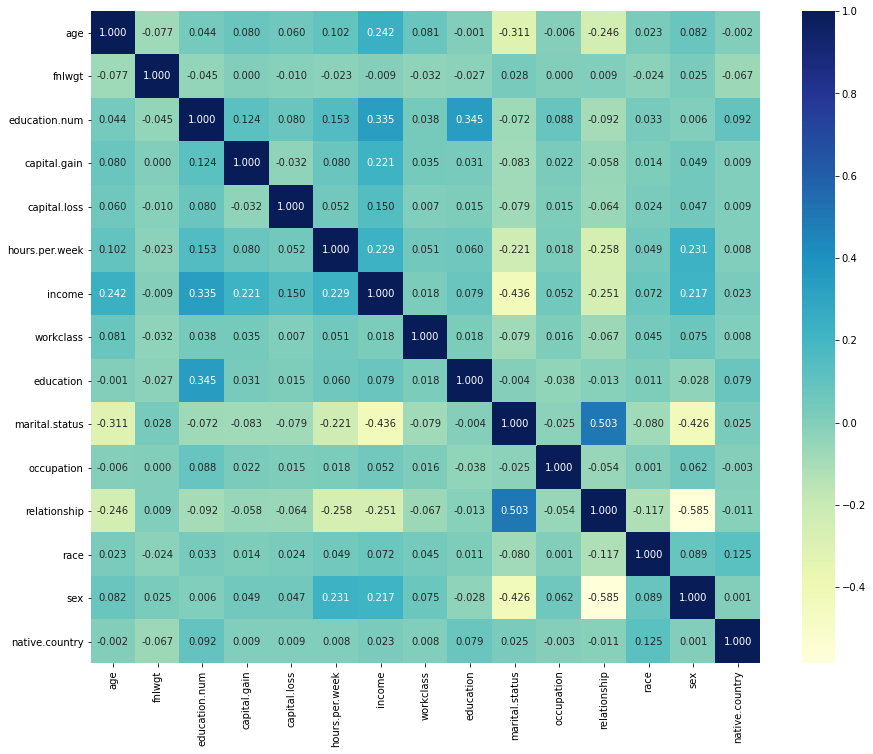

In [75]:
plt.figure(figsize=(15,12))
cor_map = df.corr()
sns.heatmap(cor_map, annot=True, fmt='.3f', cmap='YlGnBu')

### 2. Classification Task

In [76]:
from sklearn.model_selection import train_test_split

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [87]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=24)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=24)

In [88]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score

print("Random Forests accuracy", accuracy_score(y_test, y_pred))

Random Forests accuracy 0.8519173389324787


In [79]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini', random_state=21, max_depth=10)

dtree.fit(X_train, y_train)
tree_pred = dtree.predict(X_test)

print("Decision Tree accuracy: ", accuracy_score(y_test, tree_pred))

Decision Tree accuracy:  0.8477179798872804


Both the Random Forest and Decision Tree return similar prediction accuracy scores. 
However, Random Forest is marginally better and thus, it is the selected model. 

We will now optimize the Random Forest Classifier by tuning the Hyperparameters.

### Save Model

In [80]:
from joblib import dump, load

In [81]:
dump(clf, 'model.joblib')

['model.joblib']

### Load Model Locally

In [56]:
!pwd

/home/jovyan


In [57]:
clf2 = load('./gsdata/incomepred/model.joblib') 

In [58]:
clf2.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [44]:
a = X_test.iloc[:50]

In [71]:
clf2.predict(a)

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0])

In [69]:
a

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
8849,49,332355,9,0,0,40,2,11,0,3,0,4,1,38
9670,40,436493,9,0,0,25,2,11,1,7,3,4,1,38
1933,60,142494,10,15024,0,40,2,15,0,3,0,4,1,38
30288,38,207066,9,0,0,42,0,11,0,3,0,4,1,38
31139,41,423217,13,0,0,50,3,9,1,3,1,4,1,38


In [66]:
clf2.predict([[49,332355,9,0,0,40,2,11,0,3,0,4,1,38]])

array([0])

# Deploy model on Seldon Core using Terminal

Refer to Utility_Operations

# Run predictions against model deployed on Seldon

In [82]:
# 1th Row
! curl -s -d '{"data": {"ndarray": [[49,332355,9,0,0,40,2,11,0,3,0,4,1,38]]}}' -X POST http://sklearn3-default.adadmin1.svc.cluster.local:8000/api/v1.0/predictions    -H "Content-Type: application/json"

{"data":{"names":["t:0","t:1"],"ndarray":[[0.57,0.43]]},"meta":{"requestPath":{"classifier":"seldonio/sklearnserver:1.5.0"}}}


In [38]:
# 2nd Row
! curl -s -d '{"data": {"ndarray": [[40,436493,9,0,0,25,2,11,1,7,3,4,1,38]]}}'    -X POST http://sklearn3-default.adadmin1.svc.cluster.local:8000/api/v1.0/predictions    -H "Content-Type: application/json"

{"data":{"names":["t:0","t:1"],"ndarray":[[1.0,0.0]]},"meta":{"requestPath":{"classifier":"seldonio/sklearnserver:1.5.0"}}}


In [39]:
# 3rd Row
! curl -s -d '{"data": {"ndarray": [[60,142494,10,15024,0,40,2,15,0,3,0,4,1,38]]}}'    -X POST http://sklearn3-default.adadmin1.svc.cluster.local:8000/api/v1.0/predictions    -H "Content-Type: application/json"

{"data":{"names":["t:0","t:1"],"ndarray":[[0.0,1.0]]},"meta":{"requestPath":{"classifier":"seldonio/sklearnserver:1.5.0"}}}


In [34]:
# 4th Row
! curl -s -d '{"data": {"ndarray": [[38,207066,9,0,0,42,0,11,0,3,0,4,1,38]]}}'    -X POST http://sklearn3-default.adadmin1.svc.cluster.local:8000/api/v1.0/predictions    -H "Content-Type: application/json"

{"data":{"names":["t:0","t:1"],"ndarray":[[0.49,0.51]]},"meta":{"requestPath":{"classifier":"seldonio/sklearnserver:1.5.0"}}}
